## Pre-requisite

Before we start, In the code folder, you should also need to have the Working_Functions.py file and Feauture-Extraction.py.


## Training - Validation

In [2]:
# Since we will extract features on the entire dataset, all indices will be included in the `listOfIndices`.
listOfIndices = list(range(len(raveling_dataset.allData)))


In [3]:
# extract only the image-level features
imageOnlyFeatures = textureExtractor.extractFeatures(listOfIndices,patchFeature=False)


100%|██████████████████████████████████████████████████████████████████████████████| 2682/2682 [00:53<00:00, 50.09it/s]


## Feature Extraction at Both Image-Level and Patch-Level

You can explicitly define `hSize` and `wSize` before using the extractFeatures() function if you want a different patch size to be used in the feature extraction. 

In [4]:
# extract all features with patch size of 75 pixels
textureExtractor.hSize = 75
textureExtractor.wSize = 75
allFeatures_75 = textureExtractor.extractFeatures(listOfIndices)


100%|██████████████████████████████████████████████████████████████████████████████| 2682/2682 [01:49<00:00, 24.48it/s]


In [5]:
# extract all features with patch size of 400 pixels
textureExtractor.hSize = 400
textureExtractor.wSize = 400
allFeatures_400 = textureExtractor.extractFeatures(listOfIndices,patchFeature=True)



100%|██████████████████████████████████████████████████████████████████████████████| 2682/2682 [01:47<00:00, 24.91it/s]


## Save the extracted features and labels to .CSV files
Save the extracted features to reuse the features next time  **you also need to save a Labels file so you know the rating of each image in the features file.**

In [6]:
# path and file name of the files
featuresFile = "./allFeatures.csv"
labelFile = "./Labels.csv"
# featuresFile_400 = "./allFeatures_400.csv"
# labelFile_400 = "./Labels_400.csv"

# features and labels data
features = allFeatures_75 
labels = raveling_dataset.imageLabel[listOfIndices]
# features_400 = allFeatures_400 
# labels_400 = raveling_dataset.imageLabel[listOfIndices]


features.to_csv(featuresFile, index=False)
labels.to_csv(labelFile, index=False)
# features_400.to_csv(featuresFile, index=False)
# labels_400.to_csv(labelFile, index=False)



## Read the extracted features and labels from .CSV files
Similarly, if you want to use the features you extracted in the past, you can also load the features and labels data from .csv files using pandas. 

In [7]:
import pandas as pd

# path and file name of the files
featuresFile = "./allFeatures.csv"
labelFile = "./Labels.csv"

# features and labels data
features = pd.read_csv(featuresFile)
labels = pd.read_csv(labelFile)


## Split Data


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

X = features.to_numpy()
Y = labels.to_numpy().ravel()

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
sss.get_n_splits(X, Y)
for train_idx, test_idx in sss.split(X, Y):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]


## Balancing Imbalanced Dataset


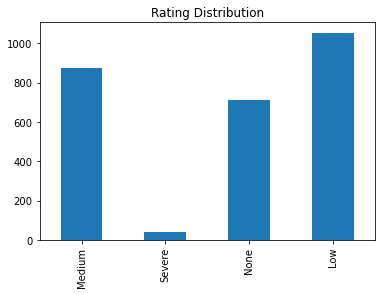

In [9]:
raveling_dataset.plotRatingDistribution()

In [10]:
# conda install -c conda-forge imbalanced-learn - On terminal

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 0)
X_train, Y_train = ros.fit_resample(X_train, Y_train)

## Features Scaling - Standardization


In [11]:
from sklearn.preprocessing import StandardScaler
# build scaler
scaler = StandardScaler()

# fit training data
scaler.fit(X_train)

# transform both training and testing data
scaler.transform(X_train)
scaler.transform(X_test)



array([[ 2.17643955,  1.93377443, -1.62147372, ...,  0.29129275,
         0.28112658,  0.27099788],
       [ 0.45476075, -1.28935566,  0.44766512, ..., -1.41454314,
        -1.41802161, -1.42108183],
       [ 0.20116767, -1.52384272,  0.8751485 , ..., -1.38162318,
        -1.37405876, -1.36621031],
       ...,
       [-0.88135147,  0.15529168, -0.19195185, ..., -0.07855341,
        -0.07357298, -0.06862809],
       [-1.13646413,  0.24309563, -0.81045718, ...,  0.08531917,
         0.09689296,  0.10831247],
       [-2.02473563, -0.03691673, -1.98827558, ...,  0.23804595,
         0.22868316,  0.21936297]])

## Training and Testing of a Supervised Learning Model
The training could take several seconds to a minute to finish. After that, the confusion matrix and other performance metrics are printed on the screen.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier

# create the classifier
clf = MLPClassifier(solver='adam', alpha=1e-4, max_iter=1000, hidden_layer_sizes=(100,), random_state=0, activation = 'relu', learning_rate_init= 1e-3)
# train the classifier
clf.fit(X_train, Y_train)
# make predictions on testing data
Y_pred = clf.predict(X_test)

print(confusion_matrix(Y_test,Y_pred,labels=["None","Low","Medium","Severe"]))
print(classification_report(Y_test,Y_pred,labels=["None","Low","Medium","Severe"],digits=3))
print("Overall Accuracy: %.3f" % (accuracy_score(Y_test,Y_pred)))

[[193  21   0   0]
 [  7 272   0  37]
 [  1 177   0  85]
 [  0   0   0  12]]
              precision    recall  f1-score   support

        None      0.960     0.902     0.930       214
         Low      0.579     0.861     0.692       316
      Medium      0.000     0.000     0.000       263
      Severe      0.090     1.000     0.164        12

    accuracy                          0.593       805
   macro avg      0.407     0.691     0.447       805
weighted avg      0.484     0.593     0.521       805

Overall Accuracy: 0.593


C:\Users\rwadhwa31\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rwadhwa31\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rwadhwa31\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Error Case Analysis

Now we can see the performance of the model overall, and for each severity class. But sometimes it is difficult to get deeper understanding of the model performance without looking at actual cases, more specifically, the error cases.

### Error Cases List

In [13]:
import pandas as pd

def getErrorCases(Y_pred, Y_test, test_idx, listOfIndices):
    
    df = pd.DataFrame(columns = ['Image Index', 'Actual Rating', 'Predicted Rating'])
    
    test_indexes = []
    actual_rating = []
    predicted_rating = []
    
    for i in range(len(Y_pred)):
        if Y_pred[i] != Y_test[i]:
            test_idx = listOfIndices[i]
            test_indexes.append(test_idx)            
            test_actual_rating = Y_test[i]
            actual_rating.append(test_actual_rating)
            test_predicted_rating = Y_pred[i]
            predicted_rating.append(test_predicted_rating)
    
    df["Image Index"] = test_indexes
    df["Actual Rating"] = actual_rating 
    df["Predicted Rating"] = predicted_rating 
    
    return df


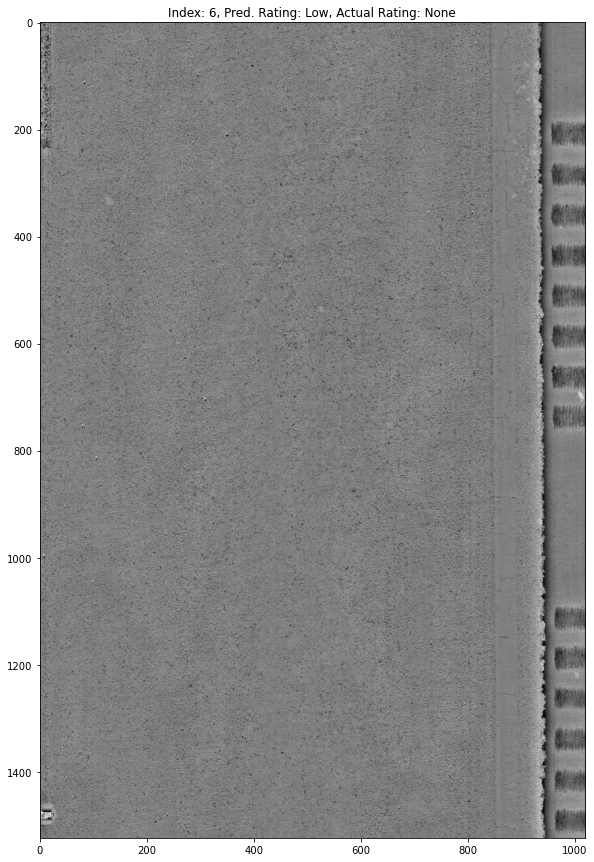

In [15]:
errorCases = getErrorCases(Y_pred, Y_test, test_idx, listOfIndices)

# get all error cases where Medium is predicted as Low
subSet = errorCases[(errorCases["Predicted Rating"]=="Low") & (errorCases["Actual Rating"]=="Medium")]

# get information about the first image of this error type
index = subSet.iloc[0][0]
actualRating = subSet.iloc[0][1]
predRating = subSet.iloc[0][2]

# display the image using showImageByIndex
raveling_dataset.showImageByIndex(index, predRating)
